learning a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system

test error: 
0.09277461387220917


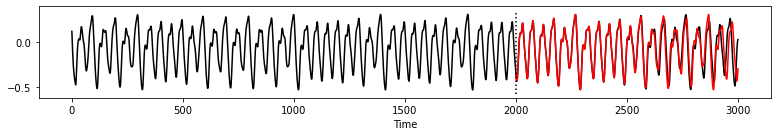

In [3]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 1.5,
         sparsity=.2,
          random_state=42)

trainlen = 2000
future = 1000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,2))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
# plt.legend(loc=(0.61,1.1),fontsize='x-small')
plt.xlabel('Time')
plt.tight_layout()
plt.savefig('MG_prediction.png', dpi = 300)

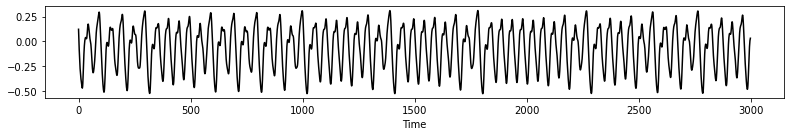

In [4]:
plt.figure(figsize=(11,2))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
# plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
# plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
# plt.legend(loc=(0.61,1.1),fontsize='x-small')
plt.xlabel('Time')
plt.tight_layout()
plt.savefig('MG_data.png', dpi = 300)